In [32]:
import cv2, os
import numpy as np
from keras import utils,layers,models,optimizers
from keras.utils import plot_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Activation,Flatten
import seaborn as sn
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [18]:
train_path="train"
val_path="validation"
train_data_list= os.listdir(train_path)
val_data_list= os.listdir(val_path)

def list_files_excluding_ds_store(path):
    return [file for file in os.listdir(path) if file != '.DS_Store']

# List all files in the train and validation directories excluding .DS_Store
train_data_list = list_files_excluding_ds_store(train_path)
val_data_list = list_files_excluding_ds_store(val_path)

In [19]:
train_data_list


['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']

In [20]:
import os
import cv2
import numpy as np

def Data_prepare(data_list, path):
    img_data = []
    for dataset in data_list:
        img_list = os.listdir(os.path.join(path, dataset))
        subfolder_path = os.path.join(path, dataset)
        # Count the number of image files in the current dataset folder
        num_items = len([item for item in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, item))])
        print(f"Loading images from folder {dataset}, {num_items} images")
        
        for img in img_list:
            input_img = cv2.imread(os.path.join(path, dataset, img))
            input_img_resized = cv2.resize(input_img, (96, 96))
            img_data.append(input_img_resized)
    # Convert list to NumPy array
    data = np.array(img_data)
    # Convert data type to float32 and normalize
    data = data.astype("float32")
    data = data / 255.0
    
    return data


In [21]:
train_data=Data_prepare(train_data_list,train_path)

Loading The images from the folder happy, 6864 images
Loading The images from the folder sad, 4638 images
Loading The images from the folder fear, 3803 images
Loading The images from the folder surprise, 2905 images
Loading The images from the folder neutral, 4682 images
Loading The images from the folder angry, 3693 images
Loading The images from the folder disgust, 336 images


In [22]:
val_data=Data_prepare(val_data_list,val_path)

Loading The images from the folder happy, 1825 images
Loading The images from the folder sad, 1139 images
Loading The images from the folder fear, 1018 images
Loading The images from the folder surprise, 797 images
Loading The images from the folder neutral, 1216 images
Loading The images from the folder angry, 960 images
Loading The images from the folder disgust, 111 images


In [24]:
num_classes= 7
num_train_samples=train_data.shape[0]
num_val_samples=val_data.shape[0]
print(f"Train data shape :{train_data.shape}")
print(f"Validation data shape :{val_data.shape}")

#Train data shape :(26921, 96, 96, 3) (i.e 26921 is number of images , 96,96 is dimesnion and 3 is RBG colors)

Train data shape :(26921, 96, 96, 3)
Validation data shape :(7066, 96, 96, 3)


In [25]:
# One hot vector -> Labels based on the number of Images in each directory
train_labels=np.ones((num_train_samples,),dtype="int64")
train_labels[0:3205] = 0 # -> Surprise
train_labels[3205:7308] = 1 # -> Fear
train_labels[7308:11301] = 2 # -> Angry
train_labels[11301:16283] = 3 # -> Netural
train_labels[16283:21221] = 4 # -> Sad
train_labels[21221:21657] = 5 # -> Disgust
train_labels[21657:28821] = 6 # -> Happy
img_train_labels=utils.to_categorical(train_labels,num_classes)


val_labels=np.ones((num_val_samples,),dtype="int64")
val_labels[0:797] = 0 # -> Surprise
val_labels[797:1815] = 1 # -> Fear
val_labels[1815:2775] = 2 # -> Angry
val_labels[2775:3991] = 3 # -> Netural
val_labels[3991:5130] = 4 # -> Sad
val_labels[5130:5214] = 5 # -> Disgust
val_labels[5214:7066] = 6 # -> Happy
img_val_labels=utils.to_categorical(val_labels,num_classes)

In [27]:
img_train_labels[12345]

array([0., 0., 0., 1., 0., 0., 0.])

In [28]:
# Shuffle
X_train,Y_train=shuffle(train_data,img_train_labels,random_state=5)
X_test,Y_test=shuffle(val_data,img_val_labels,random_state=5)

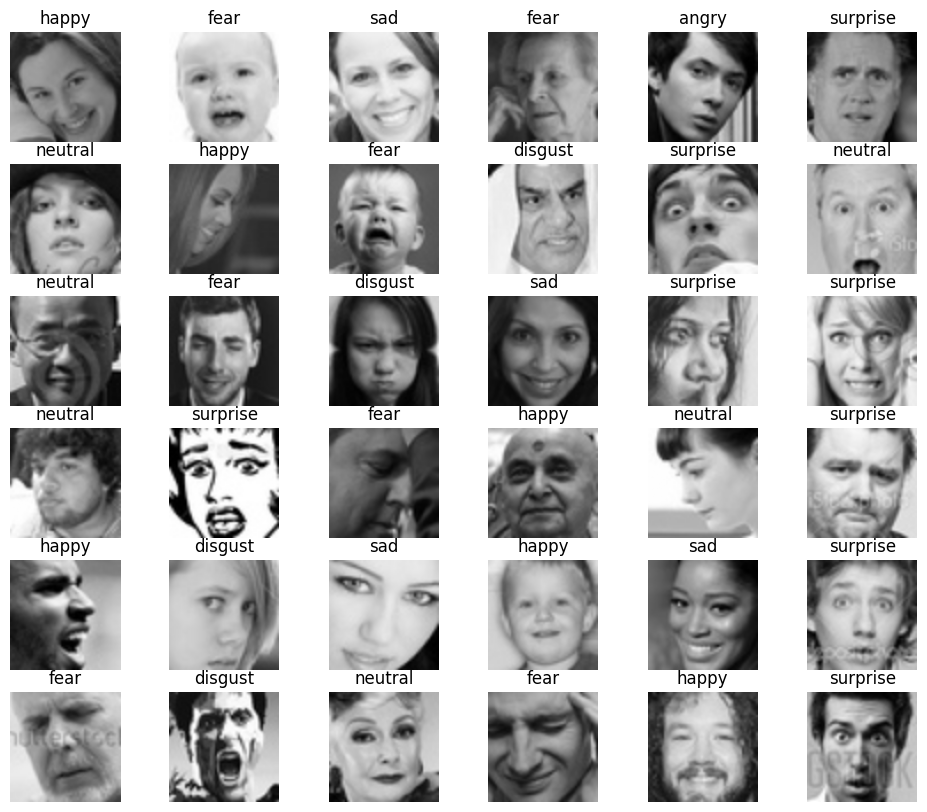

In [29]:
plt.figure(figsize=(12,10))
for i,j in enumerate(list(np.random.randint(0,len(X_train),36))): # index,item
  plt.subplot(6,6,i+1)
  plt.imshow(X_train[j])
  plt.axis("off")
  plt.title(train_data_list[list(Y_train[j].astype(int)).index(1)])

In [38]:
# Initialize the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [39]:
history = model.fit(train_data, img_train_labels, batch_size=64, epochs=20, validation_data=(val_data, img_val_labels))


Epoch 1/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 53s 124ms/step - accuracy: 0.2044 - loss: 1.8459 - val_accuracy: 0.3258 - val_loss: 1.6573
Epoch 2/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.3040 - loss: 1.6630 - val_accuracy: 0.3579 - val_loss: 1.5256
Epoch 3/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 54s 127ms/step - accuracy: 0.3606 - loss: 1.5311 - val_accuracy: 0.3783 - val_loss: 1.4679
Epoch 4/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - accuracy: 0.3931 - loss: 1.4518 - val_accuracy: 0.3964 - val_loss: 1.4185
Epoch 5/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.4313 - loss: 1.3599 - val_accuracy: 0.3818 - val_loss: 1.4146
Epoch 6/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.4651 - loss: 1.2931 - val_accuracy: 0.3791 - val_loss: 1.4391
Epoch 7/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - accuracy: 0.5183 - loss: 1.1886 - val_accuracy: 0.4057 - val_loss: 1.4421
Epoch 8/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 54s 127ms/step - accuracy: 0.5593 - loss: 1

In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,141,783 (76.83 MB)

 Trainable params: 6,713,927 (25.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,427,856 (51.22 MB)

In [41]:
loss, accuracy = model.evaluate(val_data, img_val_labels)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3937 - loss: 2.5010
Validation Loss: 2.4842617511749268, Validation Accuracy: 0.41013303399086


In [42]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_data, img_val_labels)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Make predictions on the validation dataset
predictions = model.predict(val_data)

# Convert one-hot encoded labels back to categorical labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(img_val_labels, axis=1)

# Calculate additional evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))


221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3937 - loss: 2.5010
Validation Loss: 2.4842617511749268
Validation Accuracy: 0.41013303399086
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
              precision    recall  f1-score   support

           0       0.36      0.46      0.41       797
           1       0.40      0.29      0.33      1018
           2       0.35      0.41      0.37       960
           3       0.37      0.40      0.39      1216
           4       0.43      0.44      0.43      1139
           5       0.09      0.01      0.02        84
           6       0.50      0.46      0.48      1852

    accuracy                           0.41      7066
   macro avg       0.36      0.35      0.35      7066
weighted avg       0.41      0.41      0.41      7066



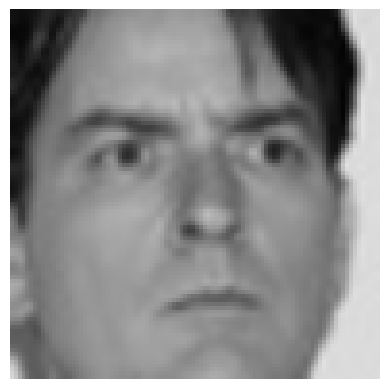

Predicted: Angry, Actual: Angry


In [18]:
from IPython.display import clear_output
import time

label_to_text = {0:'Surprise', 1:'Fear', 2:'Angry', 3:'Neutral', 4: 'Sad', 5: 'Disgust', 6: 'Happy'}
num_images_to_display = 30
display_time = 3
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

for i in random_indices:
    # Display the image
    plt.imshow(X_test[i])  
    plt.axis('off')
    plt.show()

    # Output predicted and actual labels
    print(f"Predicted: {label_to_text[y_pred_labels[i]]}, Actual: {label_to_text[y_test_labels[i]]}")

    # Wait for a few seconds before displaying the next image
    time.sleep(display_time)
    
    # Clear the output to show the next image cleanly
    clear_output(wait=True)

In [19]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     shear_range=0.3,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     fill_mode='nearest')

# validation_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow(
#     train_path,
#     target_size=(96, 96,3),
#     batch_size=32,
#     class_mode='categorical',
#     shuffle=True)

# validation_generator = validation_datagen.flow(
#     val_path,
#     target_size=(96, 96,3),
#     batch_size=32,
#     class_mode='categorical',
#     shuffle=True)